# Import Packages and Dataset
Importing required packages and dataset and converting value from Millions to Billions

In [1]:
install.packages("sarima")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘FitAR’, ‘PolynomF’, ‘FitARMA’, ‘lagged’, ‘KFAS’, ‘FKF’




In [2]:
library(tidyverse)
library(lubridate)
library(gridExtra)
library(doParallel)
library(sarima)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: foreach


Attaching package: ‘foreach’


The following objects are masked from ‘package:purrr’:

    accumulate, when


Loading required package: iterators

Loading required package: parallel

Loading required package: FitAR

Loading required package: lattice

Loading required package: leaps

Loading required package: ltsa

Loading required package: bestglm

In [3]:
data <- read_csv("../input/usa-monthly-retail-trade/SeriesReport-Not Seasonally Adjusted Sales - Monthly (Millions of Dollars).csv")
#view(data)
names(data)[names(data) == "Value"] <- 'Retail sales'
data$`Retail sales` <- data$'Retail sales'/1000
data$Period <- as.Date(data$Period, format = "%d/%m/%Y")
data <- na.omit(data)
data

Parsed with column specification:
cols(
  Period = col_character(),
  Value = col_double()
)



Period,Retail sales
<date>,<dbl>
1992-01-01,146.376
1992-02-01,147.079
1992-03-01,159.336
1992-04-01,163.669
1992-05-01,170.068
1992-06-01,168.663
1992-07-01,169.890
1992-08-01,170.364
1992-09-01,164.617


In [4]:
data_ad <- read_csv("../input/usa-monthly-retail-trade/SeriesReport-Seasonally Adjusted Sales - Monthly (Millions of Dollars).csv")
names(data_ad)[names(data_ad) == "Value"] <- 'Retail sales ad'
data_ad$`Retail sales ad` = data_ad$`Retail sales ad`/1000
data_ad$Period=as.Date(data_ad$Period, format = "%d/%m/%Y")
data_ad <- na.omit(data_ad)
data_ad

Parsed with column specification:
cols(
  Period = col_character(),
  Value = col_double()
)



Period,Retail sales ad
<date>,<dbl>
1992-01-01,164.095
1992-02-01,164.213
1992-03-01,163.721
1992-04-01,164.709
1992-05-01,165.612
1992-06-01,166.077
1992-07-01,167.257
1992-08-01,167.800
1992-09-01,169.400


# 1. Introduction
Retail sales is the purchases of finished goods and services by consumers and businesses. These goods and services have made it to the end of the supply chain. The chain starts with the goods producer or provider and ends with the retailer.
The U.S. Census Bureau measures retail sales with the monthly U.S. retail sales report.It reveals total sales, percentage change, and change in year-over-year sales.

# 2. Exploratory Data Analysis

Summary of datasets

In [5]:
summary(data$`Retail sales`)
summary(data_ad$`Retail sales ad`)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  146.4   250.6   336.1   334.9   414.7   591.4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  163.7   249.5   340.5   334.9   414.1   529.6 

These two charts show retail sales without seasonal adjustments and seasonally adjusted, respectively.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



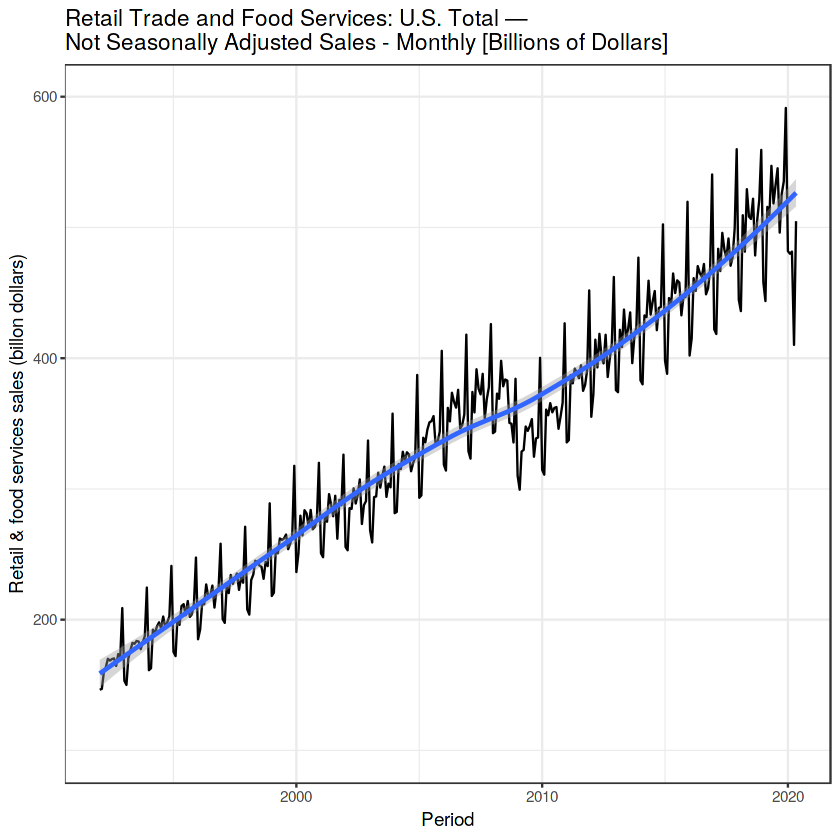

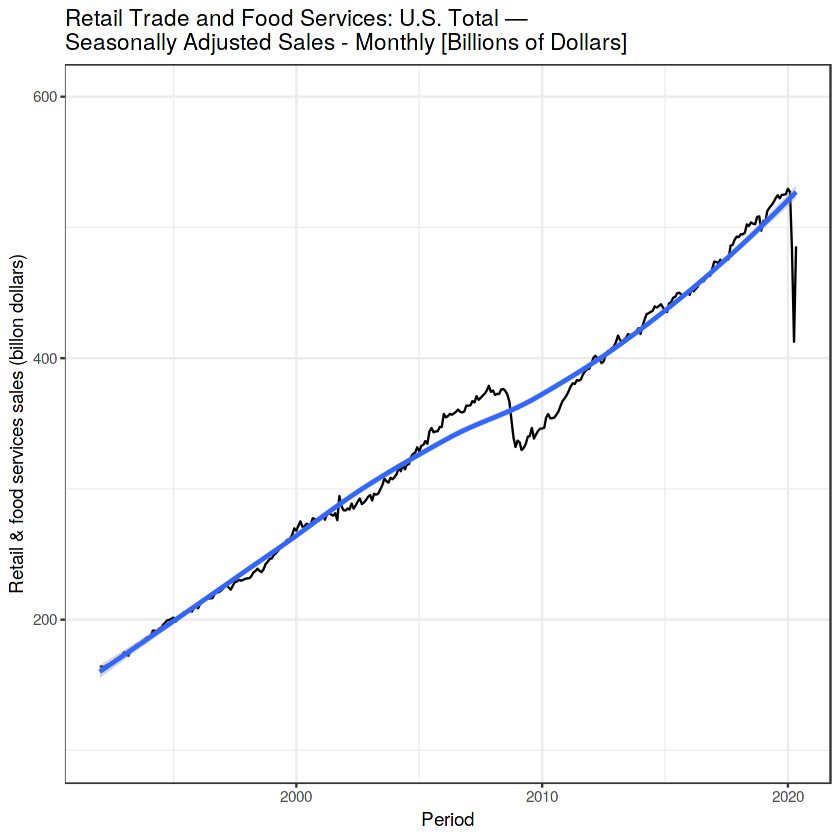

In [6]:
p1 <- data %>% ggplot(aes(x = Period, y = `Retail sales`)) + geom_line() + geom_smooth() + 
        ylab("Retail & food services sales (billon dollars)") + ylim(c(100,600)) + 
        ggtitle("Retail Trade and Food Services: U.S. Total — \nNot Seasonally Adjusted Sales - Monthly [Billions of Dollars]") + 
        theme_bw()
p1

p2 <- data_ad %>% ggplot(aes(x = Period, y = `Retail sales ad`)) + geom_line() + geom_smooth() + 
        ylab("Retail & food services sales (billon dollars)") + ylim(c(100,600)) + 
        ggtitle("Retail Trade and Food Services: U.S. Total — \nSeasonally Adjusted Sales - Monthly [Billions of Dollars]") + 
        theme_bw()
p2

Spectrum Analysis to compare Non Seasonally Adjusted Sales and Seasonally Adjusted Sales

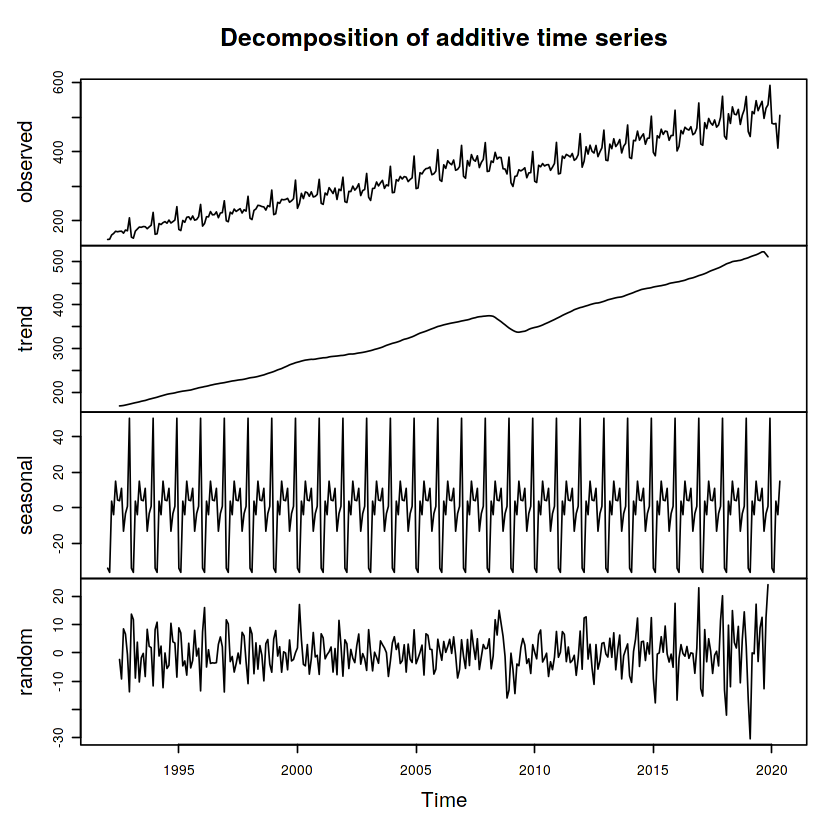

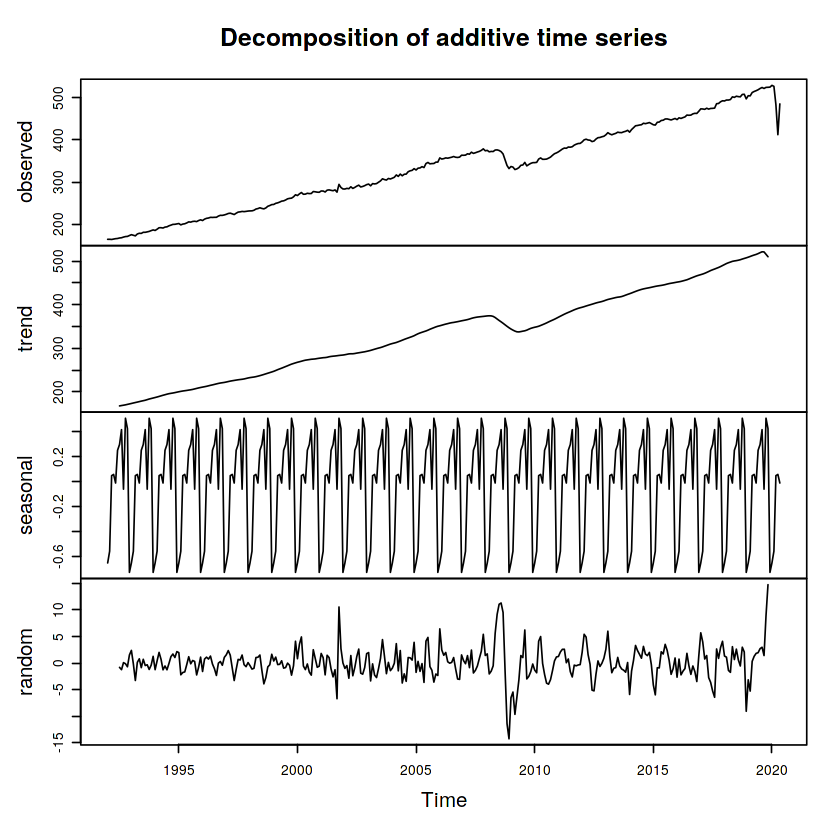

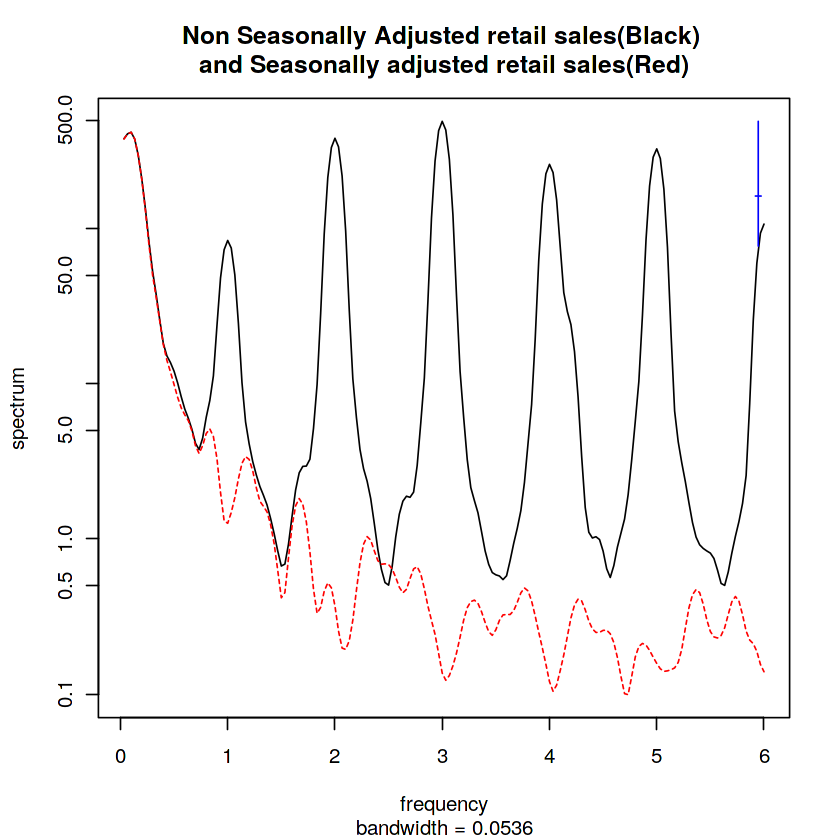

In [7]:
ts1 <- ts(data$`Retail sales`,start = 1992, frequency = 12)
components.ts = decompose(ts1)
plot(components.ts)
ts2 <- ts(data_ad$`Retail sales ad`,start = 1992, frequency = 12)
components.ts = decompose(ts2)
plot(components.ts)
spectrum(ts.union(ts1,ts2), spans = c(3,5,3), main = "Non Seasonally Adjusted retail sales(Black) \nand Seasonally adjusted retail sales(Red)")

* The x-axis units are cycles per year. 
* As shown by the spectrum frequncy plot, the seasonally adjusted retail sales removes most of the signal at seasonal frequencies

The ratio of the periodograms of the smoothed and unsmoothed time series is called the transfer function or frequency response function of the smoother.

  [1] 9.710711e-01 1.012911e+00 9.877081e-01 1.000463e+00 1.006146e+00
  [6] 1.027496e+00 7.095518e-01 8.771613e-01 1.022149e+00 1.004807e+00
 [11] 9.917037e-01 1.018757e+00 1.132202e+00 9.200431e-01 6.000610e-01
 [16] 7.963012e-01 1.084799e+00 9.829606e-01 1.078364e+00 7.224329e-01
 [21] 1.086325e+00 1.922646e+00 4.497316e-02 7.214631e-01 1.625444e+00
 [26] 4.205567e-01 6.666911e-02 4.325000e-01 7.245253e-02 2.814930e-03
 [31] 7.258317e-02 5.111089e-01 6.419162e-02 4.879040e-01 1.854946e+00
 [36] 8.598839e-01 2.190576e-01 4.355966e-01 9.238406e-01 5.593919e-01
 [41] 1.056127e+00 9.035144e-01 1.339229e+00 1.003942e+00 9.902927e-02
 [46] 7.425211e+00 3.275093e-01 9.848234e-01 9.380024e-01 1.835852e+00
 [51] 4.726146e-01 4.478003e-02 6.634665e-01 3.829153e-02 2.740978e-02
 [56] 8.599512e-03 1.301144e-02 2.710890e-02 2.317610e-02 8.621960e-05
 [61] 1.434021e-03 1.831998e-03 1.127005e-02 1.938621e-02 2.185918e-02
 [66] 1.404091e-01 1.852411e-01 3.658015e-01 3.546622e-01 2.628612e+00
 [71] 

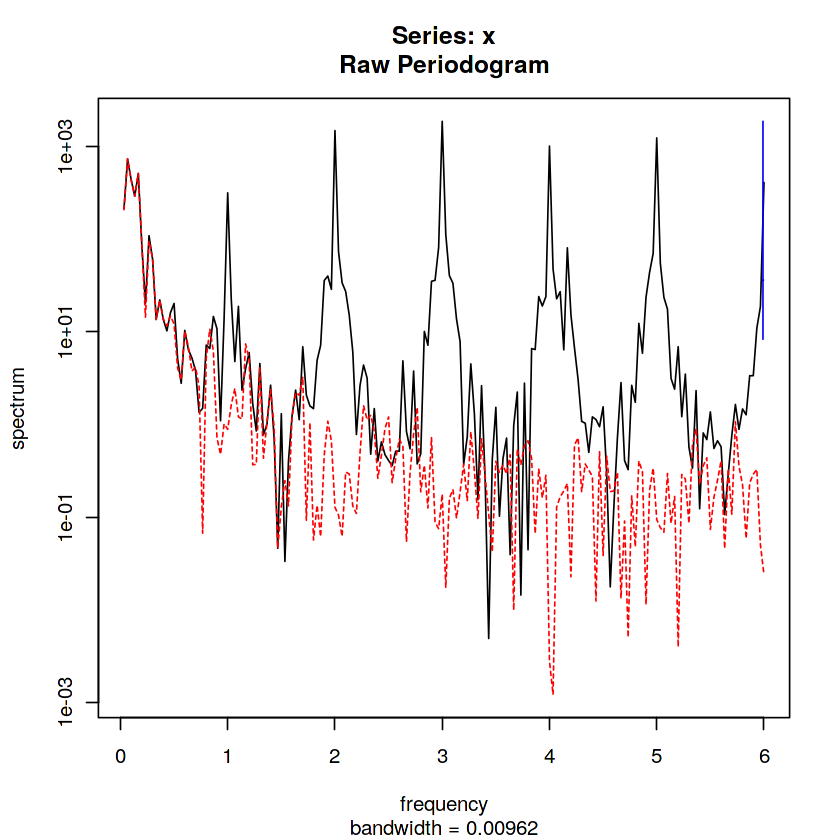

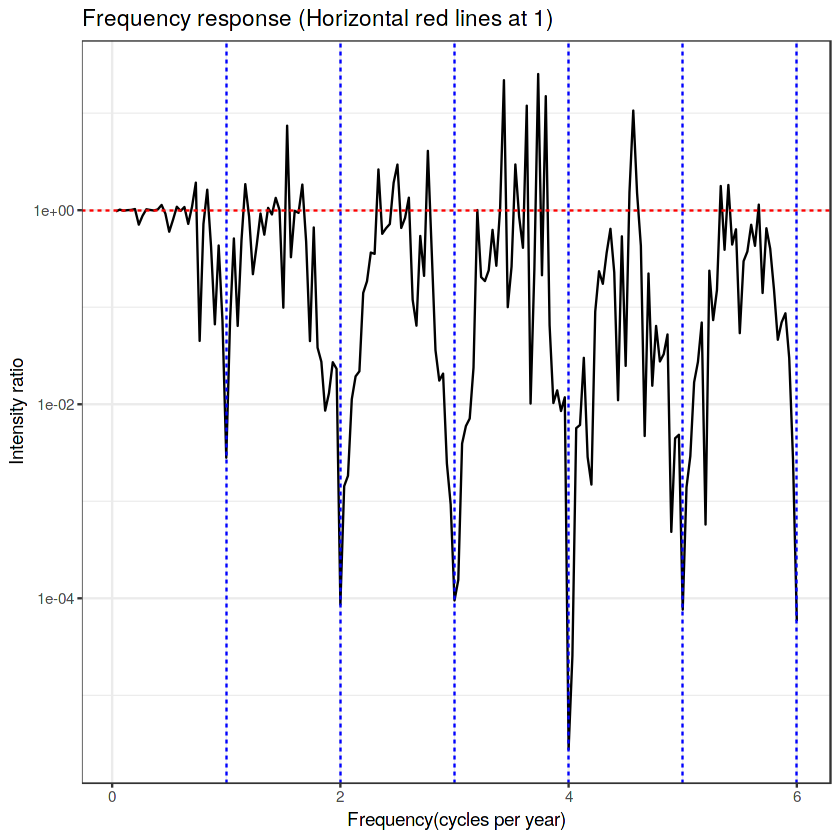

In [8]:
s <- spectrum(ts.union(ts1,ts2))
y <- s$spec[,2]/s$spec[,1]
print(y)
result <- mean(y)
print(result)
data.frame(x=s$freq,y=s$spec[,2]/s$spec[,1]) %>% ggplot(aes(x=x,y=y)) + geom_line() + 
                                                    scale_y_log10() + theme_bw() + ylab("Intensity ratio") + xlab("Frequency(cycles per year)") + 
                                                    geom_hline(yintercept = 1e+00,lty="dashed",col = "red")  + ggtitle("Frequency response (Horizontal red lines at 1)") + 
                                                    geom_vline(xintercept = c(1,2,3,4,5,6), lty="dashed", col = "blue")

[1] 12.77348


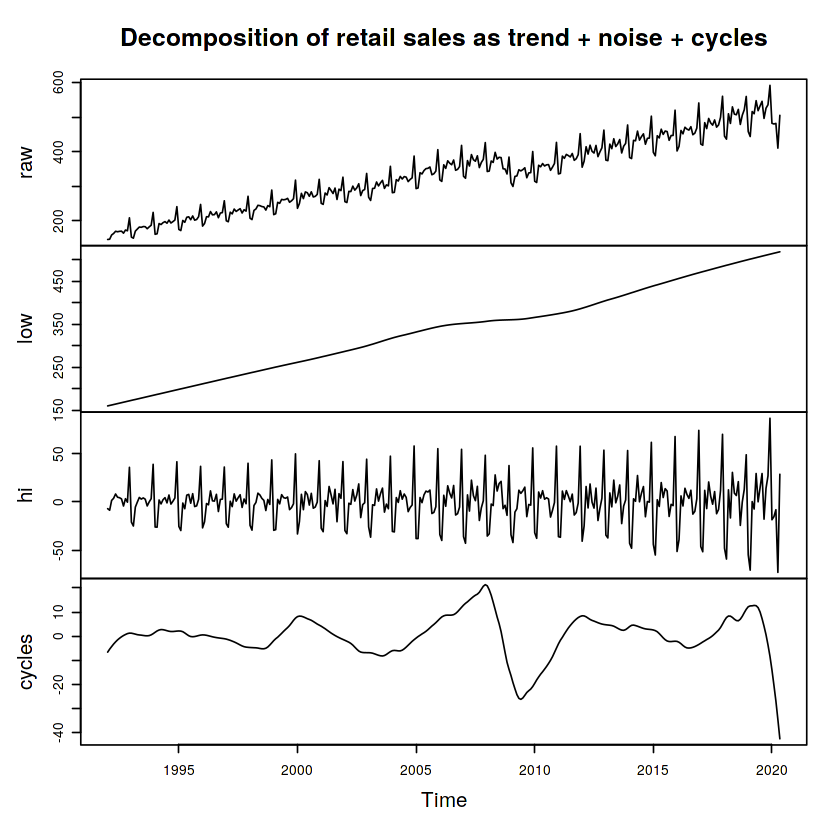

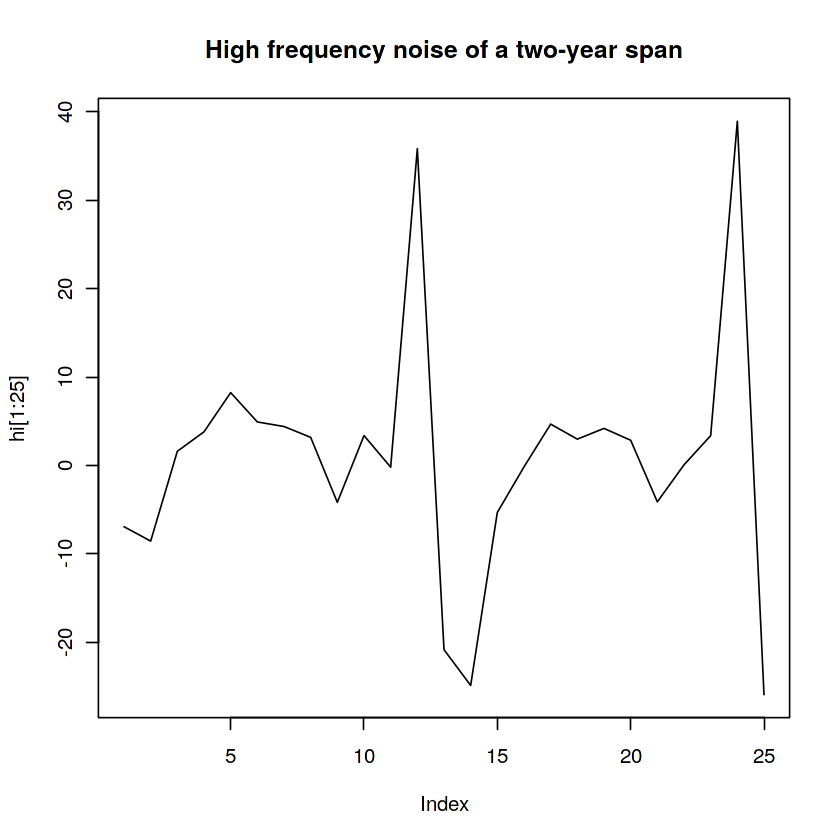

In [9]:
raw <- data$`Retail sales`
low <- ts(loess(`Retail sales`~as.numeric(Period),data,span=0.5)$fitted, start=1992,frequency=12)
hi <- ts(data$`Retail sales` - loess(data$`Retail sales`~as.numeric(data$Period),span=0.1)$fitted, start=1992,frequency=12)
cycles <- raw - hi - low
plot(ts.union(raw, low,hi,cycles),main="Decomposition of retail sales as trend + noise + cycles")
increase_rate = (low[340]-low[1])/(2020-1992)
print(increase_rate)
plot(hi[1:25],type = "l", main = "High frequency noise of a two-year span")

In [10]:
increase_rate

[1] 12.77348

From the above plot we can draw following conclusions

1. The low frequency plot shows us an estimate of the trend followed by the sales from 1992 to 2020. The average increase rate is 12.795 billion dollars per year
2. The high freguency plot shows us th seasonal changes in Retail sales. When I zoom into high frequency we see a sales peak in December and also at around May and June and this pattern occurs over every year. The seasonal change have a period of one year
3. The middle frequency plot tells us about any long term changes is their is any. I can see that their is a steady increase from 2004 to 2008, but from around 2nd quater of 2008 retail sales begin to decline and it is not until last quater of 2009 it began to climb back. This shows the stock market crash on Sept. 29, 2008.The decline in Retail Sales partly reflects the economic downturn.The same is happnning in the 1st quater of 2020 due to COVID-19 outbreak which is still going on. The decline in Retail Sales shows people refain from spending and shows the lockdown situation of the country

# 3. MODELING

From EDA we see both trend and seasonality in data

we can see a seasonal period of 12 on the retail sales data. A SARMA model with period equal to 12 can be used.

## 3.1 DEtrending the Data

In [11]:
lmod <- lm(`Retail sales ad` ~ Period, data_ad)

In [12]:
summary(lmod)


Call:
lm(formula = `Retail sales ad` ~ Period, data = data_ad)

Residuals:
    Min      1Q  Median      3Q     Max 
-93.243  -3.894  -0.122   7.811  26.834 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.039e+02  3.551e+00  -29.25   <2e-16 ***
Period       3.322e-02  2.622e-04  126.71   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.51 on 339 degrees of freedom
Multiple R-squared:  0.9793,	Adjusted R-squared:  0.9793 
F-statistic: 1.606e+04 on 1 and 339 DF,  p-value: < 2.2e-16


In [13]:
new <- data.frame(Time = data_ad$Period, Retail_sales = data_ad$`Retail sales ad`, Fitted = lmod$fitted.values) 

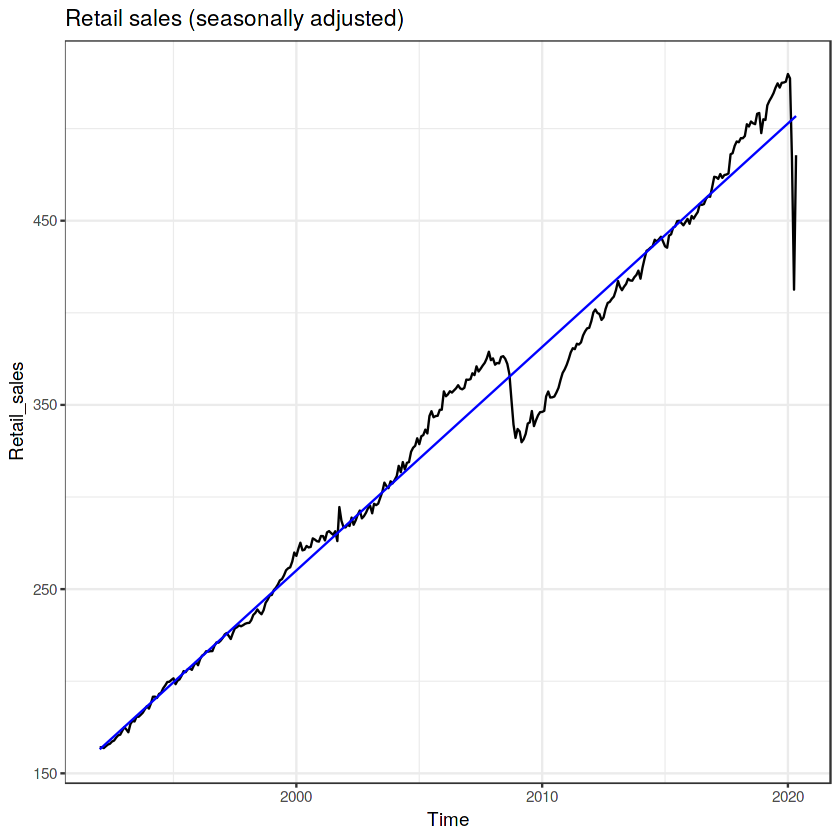

In [14]:
new %>% ggplot() + geom_line(aes(Time,Retail_sales)) + geom_line(aes(Time,Fitted),col = "blue") + theme_bw() + ggtitle("Retail sales (seasonally adjusted)")

In [15]:
new$detrend <- lmod$residuals

The linear fit looks good except for the severe economic crisis around 2008 and the latest COVID-19 outbreak

## 3.2 SARMA MODEL 

In [16]:
aic_table <- function(data,P,Q,s,a){
    table <- matrix(NA,(P+1),(Q+1))
    for(p in 0:P){
        for(q in 0:Q){
            table[p+1,q+1] <- arima(data, order = c(p,0,q), seasonal = list(order = c(s,0,a), period = 12), method="ML", optim.method = "Nelder-Mead")$aic
        }
    }
    dimnames(table) <- list(paste("AR", 0:P, sep = ""),paste("MA",0:Q, sep = ""))
    table
}

### 3.2.1 SARMA(p,q)$\times (1,0)_{12}$  model

In [17]:
table1<-aic_table(new$detrend,5,5,1,0)
require(knitr) 
kable(table1,digits=2)

Loading required package: knitr





|    |     MA0|     MA1|     MA2|     MA3|     MA4|     MA5|
|:---|-------:|-------:|-------:|-------:|-------:|-------:|
|AR0 | 2795.77| 2797.77| 2799.77| 2801.77| 2803.77| 2805.77|
|AR1 | 2797.77| 2799.77| 2801.77| 2803.77| 2805.77| 2807.77|
|AR2 | 2799.77| 2801.77| 2803.77| 2805.77| 2807.77| 2809.77|
|AR3 | 2801.77| 2803.77| 2805.77| 2807.77| 2809.77| 2811.77|
|AR4 | 2803.77| 2805.77| 2807.77| 2809.77| 2811.77| 2813.77|
|AR5 | 2805.77| 2807.77| 2809.77| 2811.77| 2813.77| 2815.77|

* Here is the ACF of the residuals and the output. From the plot, there is significant autocorrelation at lag 16 and 24
* The standard error of the model is high espacially for the intercept



Call:
arima(x = new$detrend, order = c(3, 0, 2), seasonal = list(order = c(1, 0, 0), 
    period = 12), method = "ML")

Coefficients:
         ar1      ar2     ar3      ma1     ma2     sar1  intercept
      1.0697  -0.8676  0.7272  -0.1399  0.2636  -0.1207    -1.0281
s.e.  0.2215   0.2598  0.1479   0.2232  0.1500   0.1035     4.5838

sigma^2 estimated as 39.54:  log likelihood = -1112.18,  aic = 2240.37

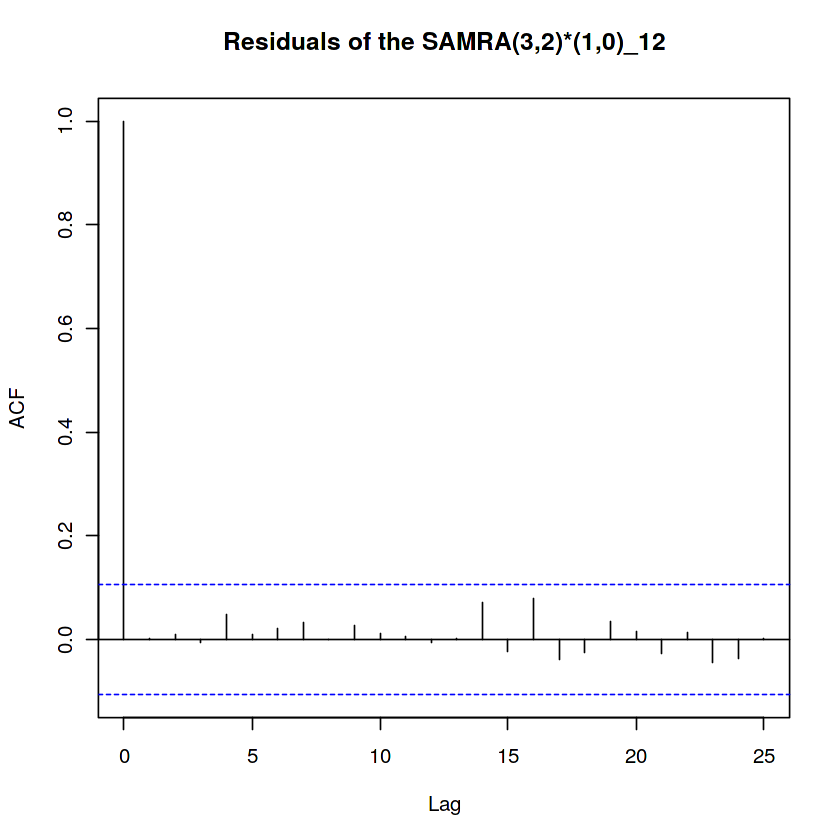

In [18]:
sarima <- arima(new$detrend, order=c(3,0,2), seasonal=list(order=c(1,0,0),period=12), method="ML")
new$sarima_fit <- new$detrend - sarima$residuals
#new %>% ggplot() + geom_line(aes(Time,detrend)) + geom_line(aes(Time,sarima_fit),col = "red") + theme_bw() +ggtitle("Retail sales (seasonally adjusted) Simulation") 
acf(sarima$residuals, main = "Residuals of the SAMRA(3,2)*(1,0)_12")
sarima

### 3.2.2 SARMA(p,q)$\times (1,1)_{12}$  model
Using SARMA(p,q)$\times (1,1)_{12}$ model to deal with the above problems

In [19]:
table2<-aic_table(new$detrend,3,3,1,1) 
kable(table2,digits=2)



|    |     MA0|     MA1|     MA2|     MA3|
|:---|-------:|-------:|-------:|-------:|
|AR0 | 2797.77| 2799.77| 2801.77| 2803.77|
|AR1 | 2799.77| 2801.77| 2803.77| 2805.77|
|AR2 | 2801.77| 2803.77| 2805.77| 2807.77|
|AR3 | 2803.77| 2805.77| 2807.77| 2809.77|

* There is a significant reduction in the residual autocorrelation at lag = 16 & 24.
* Their is reduction in standard error of the model but the error of  intercept is still high



Call:
arima(x = new$detrend, order = c(3, 0, 2), seasonal = list(order = c(1, 0, 1), 
    period = 12), method = "ML")

Coefficients:
         ar1      ar2     ar3      ma1     ma2    sar1     sma1  intercept
      1.0438  -0.8628  0.7496  -0.1278  0.2629  0.6708  -0.8451    -1.0278
s.e.  0.2016   0.2261  0.1473   0.2043  0.1466  0.1581   0.1106     2.7601

sigma^2 estimated as 38.79:  log likelihood = -1109.81,  aic = 2237.62

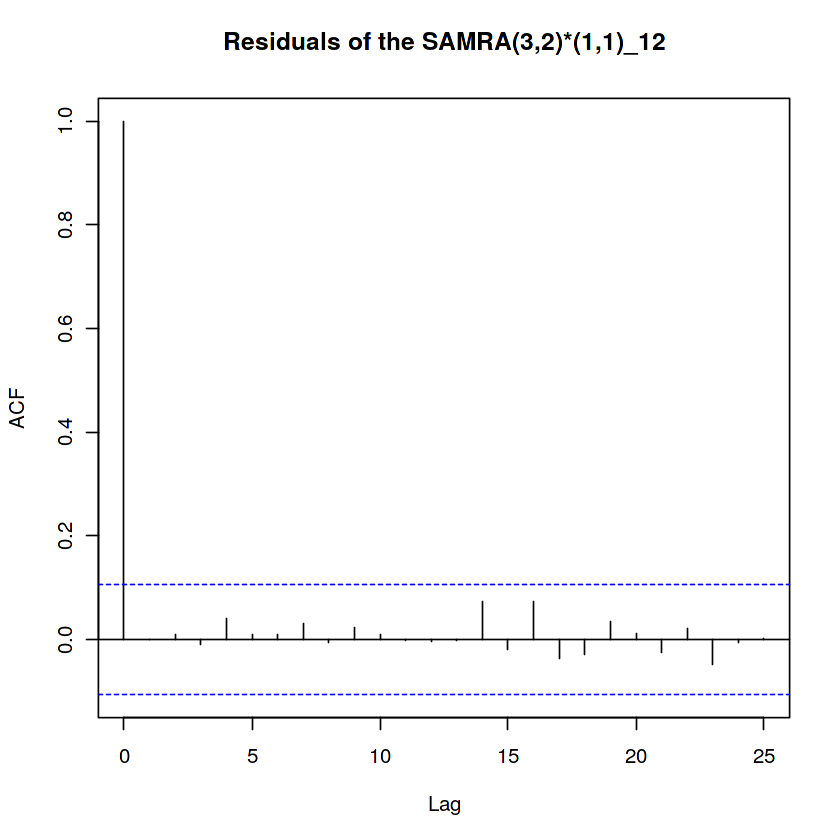

In [20]:
sarima1 <- arima(new$detrend, order=c(3,0,2), seasonal=list(order=c(1,0,1),period=12), method="ML")
new$sarima1_fit <- new$detrend - sarima1$residuals
#new %>% ggplot() + geom_line(aes(Time,detrend)) + geom_line(aes(Time,sarima1_fit),col = "red") + theme_bw() +ggtitle("Retail sales (seasonally adjusted) Simulation") 
acf(sarima1$residuals, main = "Residuals of the SAMRA(3,2)*(1,1)_12")
sarima1

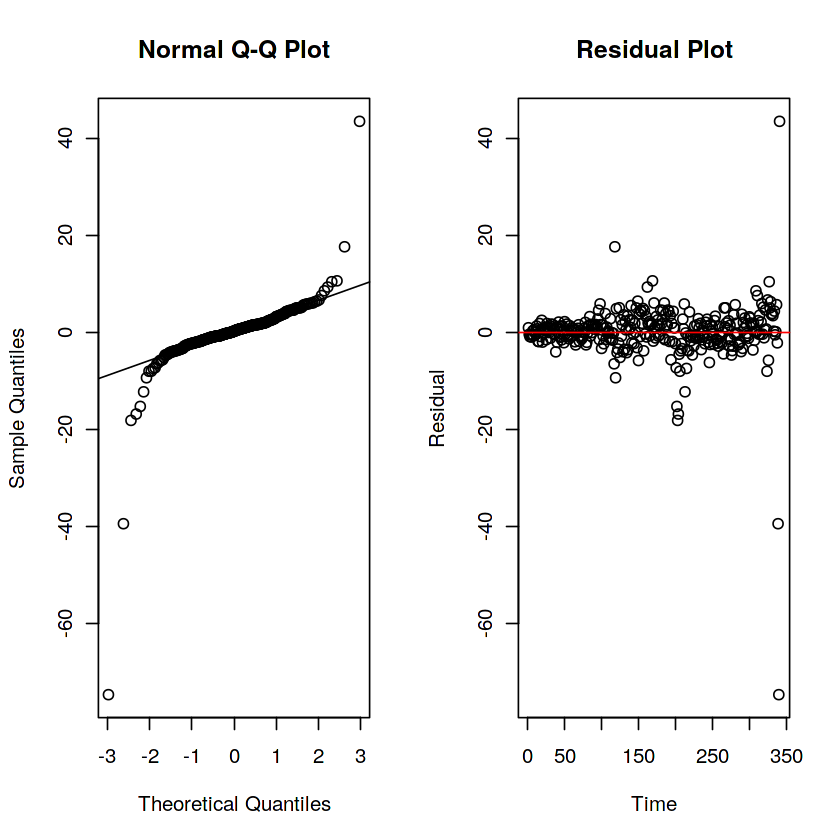

In [21]:
par(mfrow=c(1,2))
qqnorm(sarima1$residuals)
qqline(sarima1$residuals, probs = c(0.05,0.95))
plot(sarima1$residuals,type = "p", ylab = "Residual", main = "Residual Plot")
abline(a=0,b=0,col="red")

* The QQ plot shows only some points at the end deviate from the main line other than that the main line follows normal distribution.

* From the residual plot:-
    1. we can see there are a few influential points at position 200 and 300.
    2. outliers at position 120 & 350.
    3. some heteroscedasticity.

## 3.3 SARMA model on the log transformed data
since trend doesn’t change through the log transformation we can log transform the above linear model.

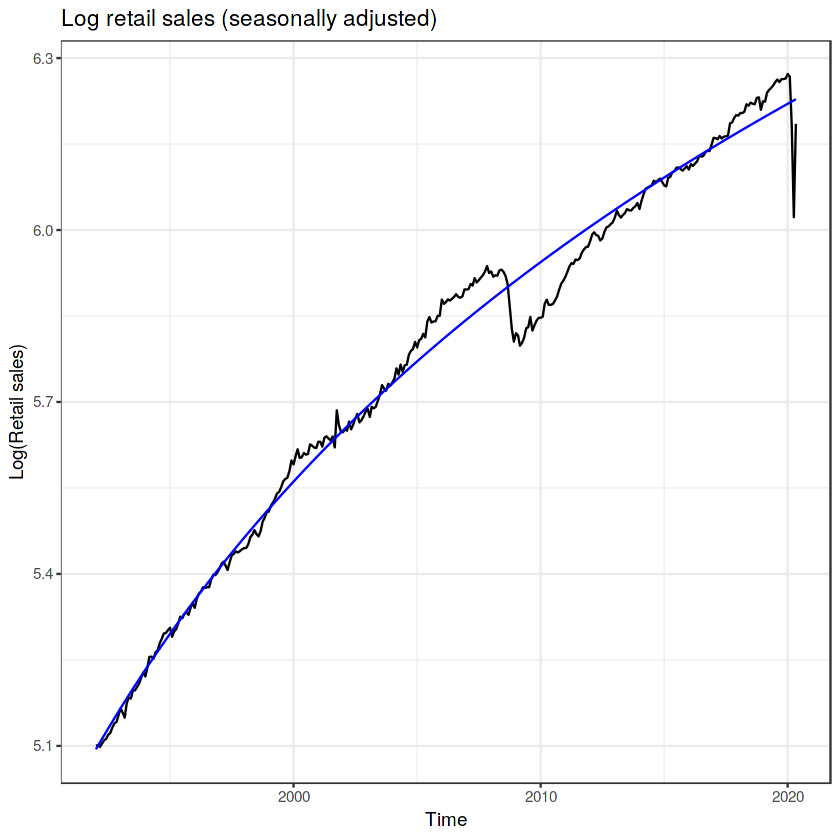

In [22]:
new_log =  data.frame(Time = data_ad$Period, Retail_sales = data_ad$`Retail sales ad`, logRetal_sales = log(data_ad$`Retail sales ad`))
new_log$Fitted = log(new$Fitted)
new_log$detrend = new_log$logRetal_sales - new_log$Fitted
new_log %>% ggplot() + geom_line(aes(Time,logRetal_sales)) + geom_line(aes(Time,Fitted),col = "blue") + theme_bw() + ggtitle("Log retail sales (seasonally adjusted)") + ylab("Log(Retail sales)")

In [23]:
aic_table2 <- function(data,P,Q,s,a){
  table <- matrix(NA,(P+1),(Q+1))
  for(p in 0:P) {
    for(q in 0:Q) {
       table[p+1,q+1] <- arima(data, order=c(p,0,q), seasonal=list(order=c(s,0,a),period=12))$aic
    }
  }
  dimnames(table) <- list(paste("AR",0:P, sep=""),paste("MA",0:Q,sep=""))
  table
}

### 3.3.1 SARMA(p,q)$\times(1,0)_{12}$ model

Warning message in arima(data, order = c(p, 0, q), seasonal = list(order = c(s, :
“possible convergence problem: optim gave code = 1”




|    |      MA0|      MA1|      MA2|      MA3|
|:---|--------:|--------:|--------:|--------:|
|AR0 | -1368.09| -1634.77| -1726.52| -1755.47|
|AR1 | -1853.70| -1862.55| -1864.31| -1863.88|
|AR2 | -1859.72| -1862.03| -1862.78| -1869.29|
|AR3 | -1867.16| -1865.23| -1865.73| -1862.85|

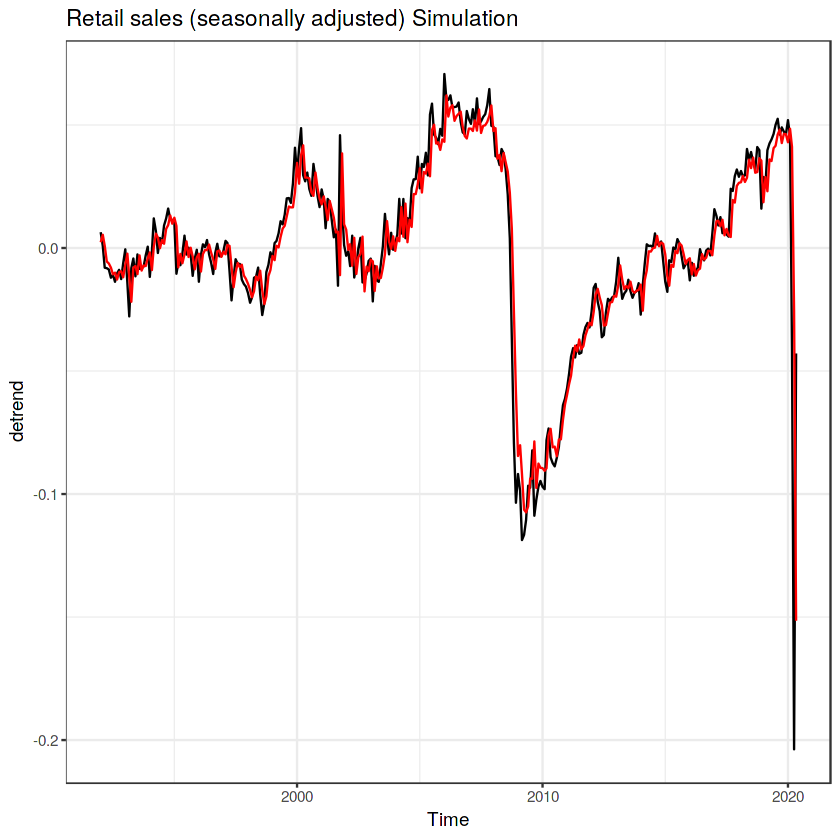


Call:
arima(x = new_log$detrend, order = c(2, 0, 2), seasonal = list(order = c(1, 
    0, 0), period = 12), method = "ML")

Coefficients:
         ar1     ar2     ma1      ma2     sar1  intercept
      0.7584  0.1960  0.0291  -0.2049  -0.1028    -0.0036
s.e.  0.2884  0.2753  0.2744   0.0837   0.0883     0.0129

sigma^2 estimated as 0.000237:  log likelihood = 938.39,  aic = -1862.78

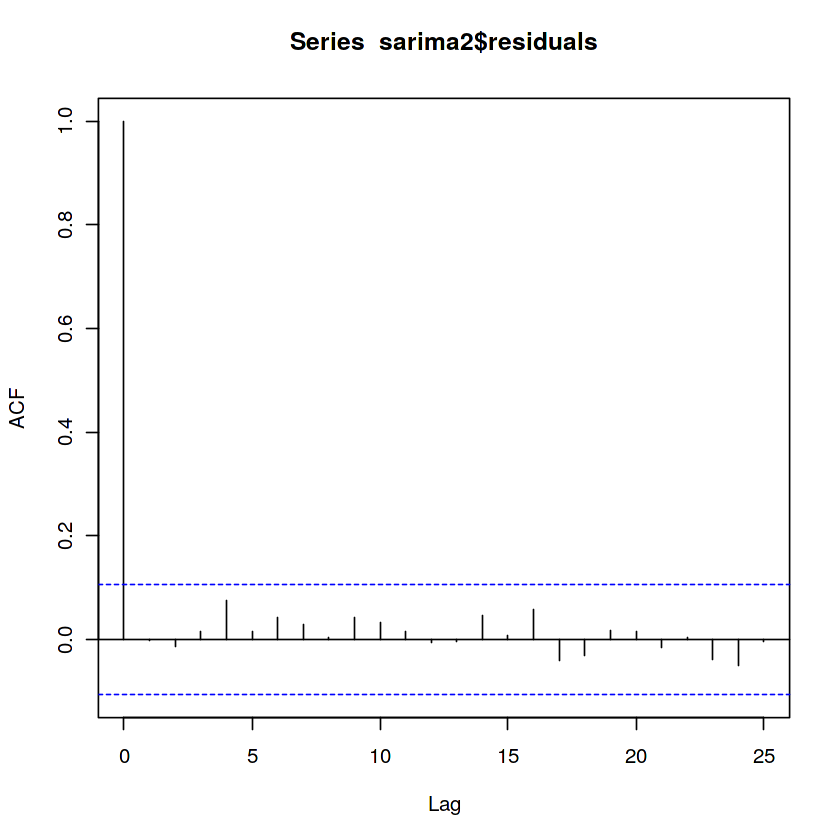

In [24]:
table3<-aic_table2(new_log$detrend,3,3,1,0) 
kable(table3,digits=2)
sarima2 <- arima(new_log$detrend, order=c(2,0,2), seasonal=list(order=c(1,0,0),period=12), method="ML")
new_log$sarima2_fit <- new_log$detrend - sarima2$residuals
new_log %>% ggplot() + 
  geom_line(aes(Time,detrend)) + 
  geom_line(aes(Time,sarima2_fit),col = "red") + 
  theme_bw() +
  ggtitle("Retail sales (seasonally adjusted) Simulation") 
acf(sarima2$residuals)
sarima2

### 3.3.2 SARMA(p,q)$\times(1,1)_{12}$ model

In [25]:
table3<-aic_table2(new_log$detrend,3,3,1,1)
kable(table3,digits=2)
sarima3 <- arima(new_log$detrend, order=c(2,0,2), seasonal=list(order=c(1,0,1),period=12))
new_log$sarima3_fit <- new_log$detrend - sarima3$residuals
sarima3



|    |      MA0|      MA1|      MA2|      MA3|
|:---|--------:|--------:|--------:|--------:|
|AR0 | -1390.18| -1642.25| -1725.89| -1754.81|
|AR1 | -1854.82| -1865.54| -1867.55| -1867.24|
|AR2 | -1861.95| -1865.22| -1866.09| -1869.69|
|AR3 | -1870.54| -1868.68| -1868.20| -1866.17|


Call:
arima(x = new_log$detrend, order = c(2, 0, 2), seasonal = list(order = c(1, 
    0, 1), period = 12))

Coefficients:
         ar1     ar2     ma1      ma2    sar1     sma1  intercept
      0.7573  0.2006  0.0130  -0.2178  0.7016  -0.8625    -0.0029
s.e.  0.2892  0.2768  0.2754   0.0885  0.1604   0.1177     0.0077

sigma^2 estimated as 0.0002321:  log likelihood = 941.04,  aic = -1866.09

comparing with the model fitted on non transformed data the standard error has significantly decreased

The ACF doesn’t show significant autocorrelation among residuals.

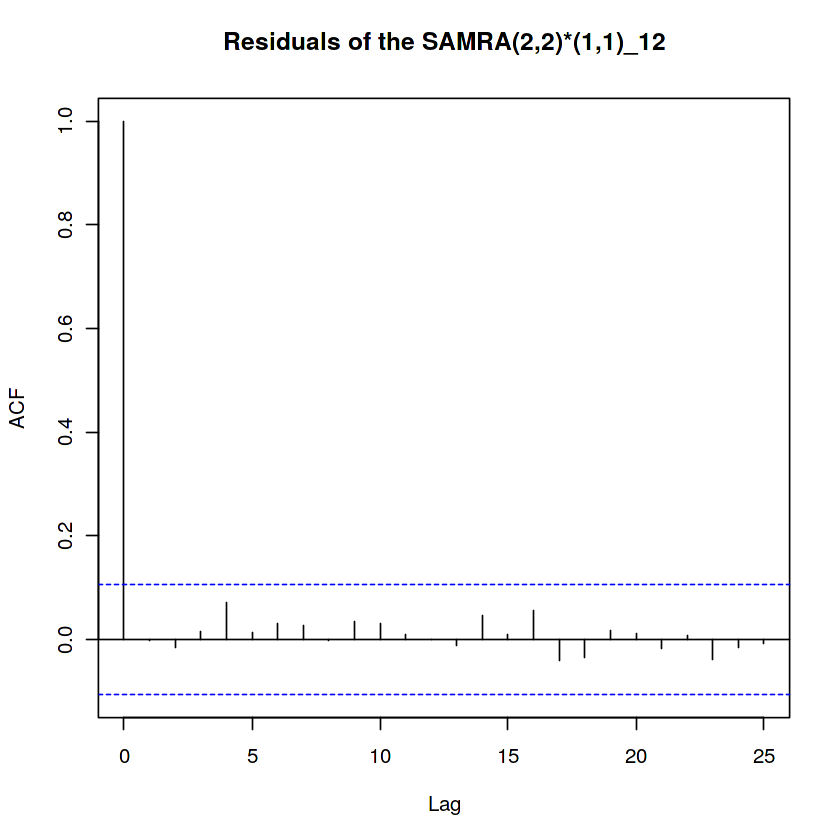

In [26]:
acf(sarima3$residuals, main = "Residuals of the SAMRA(2,2)*(1,1)_12")

The red cure if from the model  SARMA(p,q)$\times (1,1)_{12}$, which is very comparable to the original data which is shown by black line

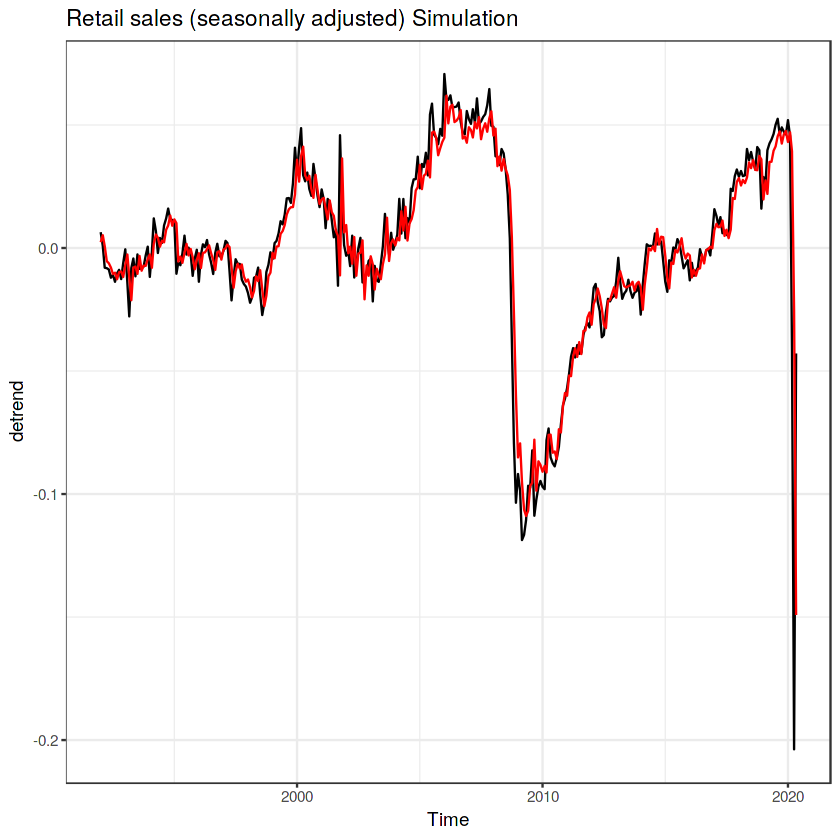

In [27]:
new_log %>% ggplot() + 
  geom_line(aes(Time,detrend)) + 
  geom_line(aes(Time,sarima3_fit),col = "red") + 
  theme_bw() +
  ggtitle("Retail sales (seasonally adjusted) Simulation")

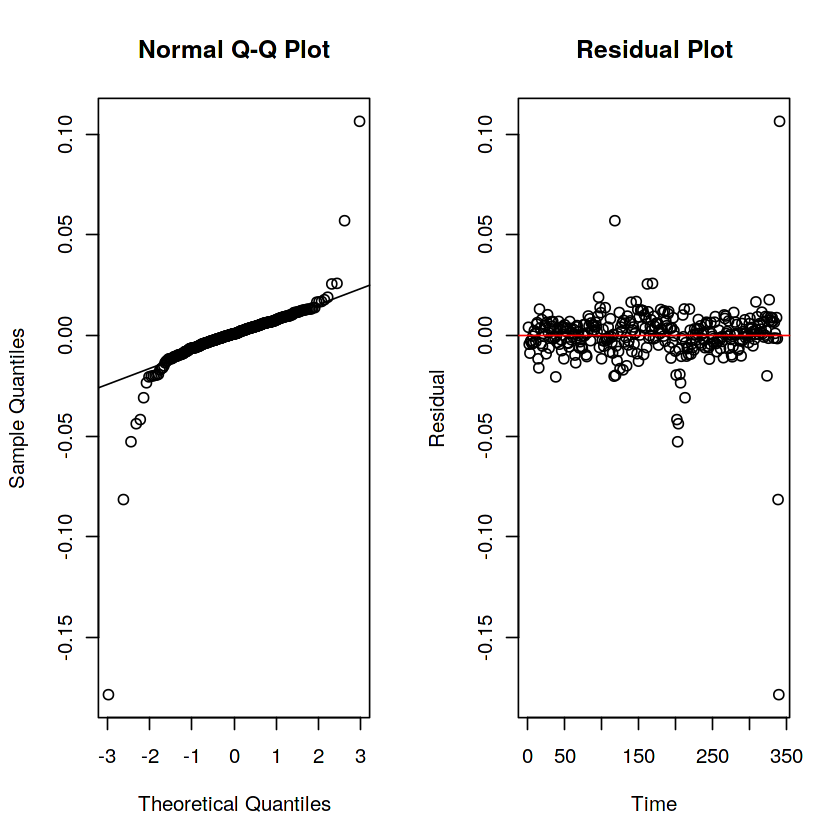

In [28]:
par(mfrow = c(1,2))
qqnorm(sarima3$residuals)
qqline(sarima3$residuals,probs = c(0.05,0.95))
plot(sarima3$residuals,type = "p",ylab = "Residual", main = "Residual Plot")
abline(a=0,b=0,col="red")

* These polt shows residuals points are now better at following normal distribution.
* The transformation does deal with the problem of the heteroscedasticity.